In [13]:
## Importing Modules ##
from os import sys
sys.path.append('../')

# Importing homemade stuff
import propellers
import motors

# Importing Standard Modules
%matplotlib widget
from matplotlib import pyplot as plt
import numpy as np

## Flow of Test

To test the ability of the model to predict efficiency without asymptotes, we need to examine the efficiency over the complete range of values possible as inputs.  

### Review of Efficiency Calculation

#### Propeller Efficiency

Propeller efficiency is determined as a function of the advance ratio denoted by:
$ J = \frac{V}{nD} $

Efficiency is calculated as the following:

$ \eta = J \frac{C_T}{C_P} $

This naturally means that a discontinuity can arise when the power coefficient approaches zero.  

Testing this requires a variation in the advance ratio, as what would be realistic for CREATeV under a wide variety of conditions.

The model for efficiency is dependent on data with: $ J \epsilon [0.137, 0.594]$, which is seen in the propeller data fits.  

In [26]:
# Initializing Propeller and Motor

aeronaut20x8 = propellers.aeronaut20x8()
aeronaut185x12 = propellers.aeronaut185x12()

motor = motors.U7V2_280KV()

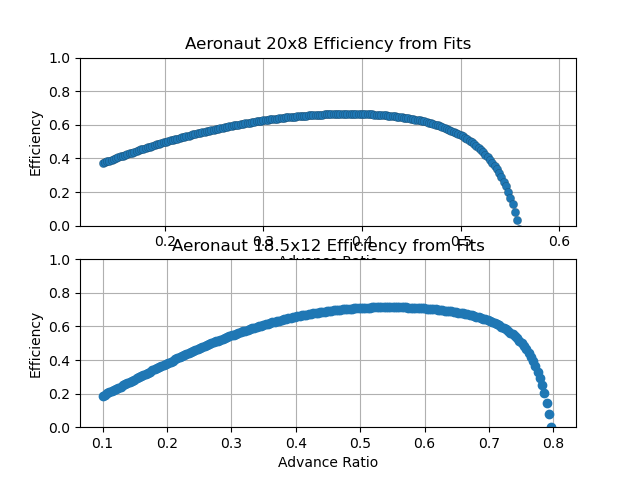

In [36]:
# Checking Efficiency Over Fitted Range

J_1 = np.linspace(0.137, 0.594, 200) # Advance ratio range, selected based on fitted range (20 x 8)
J_2 = np.linspace(0.1, 0.8, 200) # Advance ratio for 18.5 x 12
aero_20x8_efficiency = aeronaut20x8.efficiency(J_1)
aero_185x12_efficiency = aeronaut185x12.efficiency(J_2)

# Plotting Efficiency Results

plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.set_title("Aeronaut 20x8 Efficiency from Fits")
ax1.plot(J_1, aero_20x8_efficiency, linestyle='', marker='o', markeredgecolor=[0,0,0], markeredgewidth=0.1)
ax1.set_xlabel("Advance Ratio")
ax1.set_ylabel("Efficiency")
ax1.set_ylim([0,1])
ax1.grid(True)

ax2 = plt.subplot(2,1,2)
ax2.set_title("Aeronaut 18.5x12 Efficiency from Fits")
ax2.plot(J_2, aero_185x12_efficiency, linestyle='', marker='o')
ax2.set_xlabel("Advance Ratio")
ax2.set_ylabel("Efficiency")
ax2.set_ylim([0,1])
ax2.grid(True)
plt.show()

## Good Range of Propeller Efficiency

The good range of propeller efficiency is:
* Aeronaut 20 x 8 --> $ J \epsilon [0.137, 0.55] $ (With some safety margin at the high J's)
* Aeronaut 18.5 x 12 --> $ J \epsilon [0.15, 0.79] $ 

## Good Range of Motor Efficiency

Now we need to address the power train side of things.  
This tends to be more complex, because we need to understand the efficiency is a function of:
1. Rotation rate (n)
2. Electrical current draw (Standing in for torque)

```
    def efficiency(self, n, current, MyxaESC=True):
            # Motor efficiency of U7V2 with ASI or Zubax controller
            # Inputs:
            # 1. Rotations per second (n)
            # 2. Current draw (Measured by the ESC)
            # Outputs:
            # 1. Motor efficiency

            if MyxaESC:
                # Parameters from fitting
                # R^2 = 0.99821
                # Using data from U7-4 and Myxa ESC
                i00 =      0.1035
                i01 =   0.0003938
                i02 =   1.128e-06

                Kv =          280
                Kq =          304
                tau =  -0.0002069
                R =       0.01541

    % Modifying inputs:
        omega = 2 * np.pi * n
        i0 = i00 + i01*omega + i02*omega**2
        
        efficiency = (1 - (i0/current)) * (Kv/Kq) * (1 + tau*omega + current*R*Kv*omega**-1)**-1
        return efficiency

    def motor_current(self, torque):
        # Finding the current through ESC from the torque: based on fit of WT data
        Q = torque
        i = 17.98 * Q**2 + 8.493 * Q**1 + 0.363
        return i
```

/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/../motors.py:53: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = (1 - (i0/current)) * (Kv/Kq) * (1 + tau*omega + current*R*Kv*omega**-1)**-1;
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/../motors.py:53: RuntimeWarning: divide by zero encountered in reciprocal
  efficiency = (1 - (i0/current)) * (Kv/Kq) * (1 + tau*omega + current*R*Kv*omega**-1)**-1;
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/../motors.py:53: RuntimeWarning: invalid value encountered in multiply
  efficiency = (1 - (i0/current)) * (Kv/Kq) * (1 + tau*omega + current*R*Kv*omega**-1)**-1;
/Users/williamkemp/opt/anaconda3/envs/superwake-records/lib/python3.10/site-packages/mpl_toolkits/mplot3d/axes3d.py:1753: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/Users/williamkemp/opt/anaconda3/envs/superwake-records/l

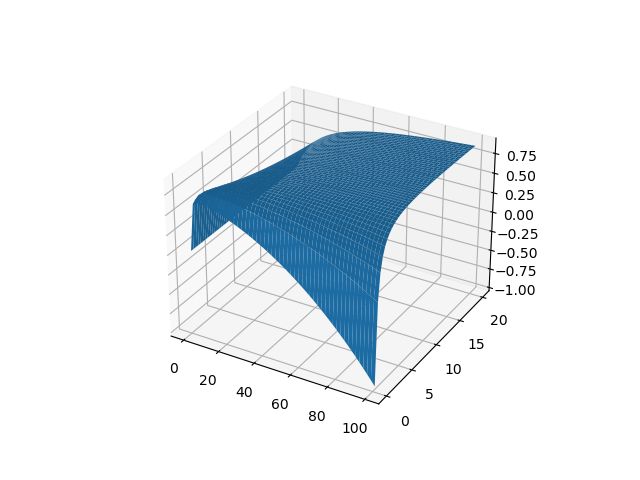

In [38]:
## Checking

i = np.linspace(0, 20)
n = np.linspace(0, 100)
[N, I] = np.meshgrid(n, i)
EFF = motor.efficiency(N, I)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(N, I, EFF)
plt.show()